 # Args Parser

In [2]:
import argparse
import sys

def str2bool(v): # this is an utils function
    if isinstance(v, bool):
        return v
    if v.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif v.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')

def args_parser():
    parser = argparse.ArgumentParser()
    ## Wandb parameters
    parser.add_argument('--wandb_key', type=str, default='', help='wandb key')
    parser.add_argument('--wandb_username', type=str, default='', help='wandb userna,,e')
    parser.add_argument('--wandb_project', type=str, default='charBert', help='wandb project')
    parser.add_argument('--wandb_run_name', type=str, default='charBert', help='wandb run name')
    parser.add_argument('--logfile', type=str, default='/content/logger.log', help='log file name')
    parser.add_argument('--data_dir', type=str, default='./data', help='data directory')

    # federated arguments (Notation for the arguments followed from paper)
    parser.add_argument('--epochs', type=int, default=2000,
                        help="number of rounds of training")
    parser.add_argument('--last_epoch', type=int, default=1900,
                        help="number of rounds of old clients training")
    parser.add_argument('--num_users', type=int, default=100,
                        help="number of total users: K")
    parser.add_argument('--n_nodes', type=int, default=90,
                        help="number of already seen users")
    parser.add_argument('--Nc', type=int, default=5,
                        help='number of class each client in non iid')
    parser.add_argument('--frac', type=float, default=0.1,
                        help='the fraction of clients: C')
    parser.add_argument('--local_ep', type=int, default=4,
                        help="the number of local rounds: J")
    parser.add_argument('--local_bs', type=int, default=64,
                        help="local batch size: B")
    parser.add_argument('--lr', type=float, default=0.01,
                        help='learning rate')
    parser.add_argument('--inner_lr', type=float, default=0.01,
                        help='local learning rate')
    parser.add_argument("--wd", type=float, default=4e-4,
                        help="weight decay")
    parser.add_argument('--momentum', type=float, default=0.5,
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--tol', type=float, default=1,
                        help='the maximum allowed difference between \
                        old and new clients accuracy')
    parser.add_argument('--bias', type=float, default=1,
                        help='A bias value between 0 and 1 that specifies the\
                         likelihood of selecting new clients during training')
    parser.add_argument('--extra', type=float, default=0,
                        help='The number of extra rounds of \
                        new clients fine tuning')


    # model arguments
    parser.add_argument('--model', type=str, default='cnn', help='model name')
    parser.add_argument('--kernel_num', type=int, default=9,
                        help='number of each kind of kernel')
    parser.add_argument('--kernel_sizes', type=str, default='3,4,5',
                        help='comma-separated kernel size to \
                        use for convolution')
    parser.add_argument('--num_channels', type=int, default=1, help="number \
                        of channels of imgs")
    parser.add_argument('--norm', type=str, default='batch_norm',
                        help="batch_norm, layer_norm, or None")
    parser.add_argument('--num_filters', type=int, default=32,
                        help="number of filters for conv nets -- 32 for \
                        mini-imagenet, 64 for omiglot.")
    parser.add_argument('--max_pool', type=str, default='True',
                        help="Whether use max pooling rather than \
                        strided convolutions")
    parser.add_argument('--checkpoint_resume', type=int, default=0,
                        help='resume from checkpoint, 0 for False, 1 for True')
    parser.add_argument("--inner-wd", type=float, default=5e-5,
                        help="inner weight decay")
    parser.add_argument("--embed-dim", type=int, default=-1,
                        help="embedding dim")
    parser.add_argument("--embed-lr", type=float, default=None,
                        help="embedding learning rate")
    parser.add_argument("--hyper-hid", type=int, default=100,
                        help="hypernet hidden dim")
    parser.add_argument("--spec-norm", type=str2bool, default=False,
                        help="hypernet hidden dim")
    parser.add_argument('--algorithm', type=str, default='pFedHN', help='Default set to FedAvg.')

    parser.add_argument('--merge', type=int, default=1, help='if train and val \
                        should be merged during KNN')


    # other arguments
    parser.add_argument('--dataset', type=str, default='cifar', help="name \
                        of dataset")
    parser.add_argument('--val_split', type=float, default=0.2,
                        help="train-validation split")
    parser.add_argument('--num_classes', type=int, default=100, help="number \
                        of classes")
    parser.add_argument('--gpu', default=None, help="To use cuda, set \
                        to a specific GPU ID. Default set to use CPU.")
    parser.add_argument('--optimizer', type=str, default='sgd', help="type \
                        of optimizer")
    parser.add_argument('--iid', type=int, default=0,
                        help='Default set to IID. Set to 0 for non-IID.')
    parser.add_argument('--participation', type=int, default=1,
                        help='Default set to Uniform Participation. Set to 0 for Skewed')
    parser.add_argument('--backup', type=int, default=500,
                        help='How often an old backup should be preserved')
    parser.add_argument('--checkpoint_path', type=str, default=".",
                        help='Saved models location')
    parser.add_argument('--stopping_rounds', type=int, default=10,
                        help='rounds of early stopping')
    parser.add_argument('--print_every', type=int, default=10,
                        help='how often the train_accuracy is computed, and \
                        how often a new checkpoint is saved')
    parser.add_argument('--verbose', type=int, default=0, help='verbose')
    parser.add_argument('--gamma', type=float, default=0.1, help='gamma')
    parser.add_argument('--metrics_dir', type=str, default='/content/drive/MyDrive/MLDL/cifar/metrics', help='metrics directory')

    # KNN
    parser.add_argument(
            "--seed",
            type=int,
            default=42,
            help='random seed; if not specified the system clock is used to generate the seed'
        )
    parser.add_argument(
            '--weights_grid_resolution',
            help='the resolution of the weights grid, the smaller it is the higher the resolution;'
                 ' should be smaller then 1.; higher value of resolution requires more computation time.',
            type=float
        )
    parser.add_argument(
            '--capacities_grid_resolution',
            help='the resolution of the capacities, the smaller it is the higher the resolution;'
                 ' should be smaller then 1.; higher value of resolution requires more computation time.',
            type=float
        )
    parser.add_argument(
            "--n_neighbors",
            type=int,
            default=42,
            help="number of neighbours used in nearest neighbours retrieval;"
        )
    parser.add_argument(
            '--strategy',
            help='name of the strategy used to build the datastore;'
                 ' possible are; `random`',
            type=str,
            default='random'
        )
    parser.add_argument(
            '--interpolate_logits',
            help='if selected logits are interpolated instead of probabilities',
            default="store_true",
            type=str
        )
    parser.add_argument(
        '--client_id',
        help = 'used to update the client_id in the pfedhn',
        default = 0,
        type = int
    )

    # If running in a notebook, ignore the first argument which is the script name
    args = parser.parse_args(args=sys.argv[1:] if "__file__" in globals() else [])
    return args


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

!conda --version

# prompt: edit this script if there is gpu install faiss-gpu else faiss-cpu:
# !conda install -c pytorch -c nvidia faiss-gpu=1.8.0 pytorch torchvision torchaudio pytorch-cuda=12.1 matplotlib numpy pandas

if True:
  !conda install -c pytorch -c nvidia faiss-gpu=1.8.0 pytorch torchvision torchaudio pytorch-cuda=12.1 matplotlib numpy pandas
else:
  !conda install -c pytorch faiss-cpu=1.8.0 pytorch torchvision torchaudio matplotlib numpy pandas

Streaming output truncated to the last 5000 lines.








pillow-10.3.0        | 39.8 MB   | :   0% 0/1 [00:00<?, ?it/s]











libllvm15-15.0.7     | 31.8 MB   | :   0% 0/1 [00:00<?, ?it/s]












cuda-nvrtc-12.1.105  | 19.7 MB   | :   0% 0/1 [00:00<?, ?it/s]













libnvjitlink-12.1.10 | 16.9 MB   | :   0% 0/1 [00:00<?, ?it/s]














cuda-cupti-12.1.105  | 15.4 MB   | :   0% 0/1 [00:00<?, ?it/s]















pandas-2.2.2         | 12.4 MB   | :   0% 0/1 [00:00<?, ?it/s]
















ffmpeg-4.3           | 9.9 MB    | :   0% 0/1 [00:00<?, ?it/s]

















libclang13-15.0.7    | 9.1 MB    | :   0% 0/1 [00:00<?, ?it/s]


















 ... (more hidden) ...
libcublas-12.1.0.26  | 329.0 MB  | :   0% 4.7496622446298464e-05/1 [00:00<54:38, 3278.96s/it]



libcusparse-12.0.2.5 | 163.0 MB  | :   0% 9.588357486739811e-05/1 [00:00<26:55, 1615.96s/it]

pytorch-2.4.1        | 1.35 GB   | :   0% 1.1343550276962258e-05/1 [00:00<5:20:11, 19211.53s/it]


torchtri

# Costants

In [3]:
import string


ALL_STRATEGIES = {
    "random"
}

ALL_MODELS = {
    "mobilenet"
}
LOADER_TYPE = {
    "synthetic": "tabular",
    "cifar10": "cifar10",
    "cifar100": "cifar100",
    "femnist": "femnist",
    "shakespeare": "shakespeare"
}

EXTENSIONS = {
    "tabular": ".pkl",
    "cifar10": ".pkl",
    "cifar100": ".pkl",
    "femnist": ".pt",
    "shakespeare": ".txt"
}

N_CLASSES = {
    "synthetic": 1,
    "cifar10": 10,
    "cifar100": 100,
    "femnist": 62,
    "shakespeare": 100
}

EMBEDDING_DIM = {
    "cifar10": 1280,
    "cifar100": 192,
    "femnist": 1280,
    "shakespeare": 1024
}

SHAKESPEARE_CONFIG = {
    "input_size": len(string.printable),
    "embed_size": 8,
    "hidden_size": 256,
    "output_size": len(string.printable),
    "n_layers": 2,
    "chunk_len": 80
}


# NUM_WORKERS = os.cpu_count()  # number of workers used to load data and in GPClassifier
NUM_WORKERS = 1

# Models

In [9]:
import torch.nn.functional as F
from torch import nn

class CIFARLeNet(nn.Module):
    """
    A neural network model inspired by LeNet5, designed for CIFAR-100 dataset.

    Attributes:
    ----------
    flatten : nn.Module
        A layer to flatten the input tensor.
    conv1 : nn.Module
        First convolutional layer with 3 input channels and 64 output channels.
    conv2 : nn.Module
        Second convolutional layer with 64 input channels and 64 output channels.
    pool : nn.Module
        Max pooling layer with kernel size of 2.
    fc1 : nn.Module
        Fully connected layer with input size 64*5*5 and output size 384.
    fc2 : nn.Module
        Fully connected layer with input size 384 and output size 192.
    fc3 : nn.Module
        Fully connected layer with input size 192 and output size 100.
    """

    def __init__(self):
        """
        Initialize the CIFARLeNet model with its layers.
        """
        super(CIFARLeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64 * 5 * 5, 384)
        self.fc2 = nn.Linear(384, 192)
        self.fc3 = nn.Linear(192, 100)
    def produce_feature(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        ----------
        x : torch.Tensor
            The input tensor.

        Returns:
        -------
        torch.Tensor
            The output tensor after applying all the layers.
        """
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [10]:
import torch.nn.functional as F
from torch import nn
from torch.nn.utils import spectral_norm

class CNNHyper(nn.Module):
    def __init__(
            self, n_nodes, embedding_dim, in_channels=3, out_dim=100, n_kernels=64, hidden_dim=100,
            spec_norm=False, n_hidden=1):
        super().__init__()

        self.in_channels = in_channels
        self.out_dim = out_dim
        self.n_kernels = n_kernels
        self.embeddings = nn.Embedding(num_embeddings=n_nodes, embedding_dim=embedding_dim)

        layers = [
            spectral_norm(nn.Linear(embedding_dim, hidden_dim)) if spec_norm else nn.Linear(embedding_dim, hidden_dim),
        ]
        for _ in range(n_hidden):
            layers.append(nn.ReLU(inplace=True))
            layers.append(
                spectral_norm(nn.Linear(hidden_dim, hidden_dim)) if spec_norm else nn.Linear(hidden_dim, hidden_dim),
            )

        self.mlp = nn.Sequential(*layers)

        self.c1_weights = nn.Linear(hidden_dim, self.n_kernels * self.in_channels * 5 * 5)
        self.c1_bias = nn.Linear(hidden_dim, self.n_kernels)
        self.c2_weights = nn.Linear(hidden_dim, self.n_kernels * self.n_kernels * 5 * 5)
        self.c2_bias = nn.Linear(hidden_dim, self.n_kernels)
        self.l1_weights = nn.Linear(hidden_dim, 384 * 64 * 5 * 5)
        self.l1_bias = nn.Linear(hidden_dim, 384)
        self.l2_weights = nn.Linear(hidden_dim, 192 * 384)
        self.l2_bias = nn.Linear(hidden_dim, 192)
        self.l3_weights = nn.Linear(hidden_dim, self.out_dim * 192)
        self.l3_bias = nn.Linear(hidden_dim, self.out_dim)

        if spec_norm:
            self.c1_weights = spectral_norm(self.c1_weights)
            self.c1_bias = spectral_norm(self.c1_bias)
            self.c2_weights = spectral_norm(self.c2_weights)
            self.c2_bias = spectral_norm(self.c2_bias)
            self.l1_weights = spectral_norm(self.l1_weights)
            self.l1_bias = spectral_norm(self.l1_bias)
            self.l2_weights = spectral_norm(self.l2_weights)
            self.l2_bias = spectral_norm(self.l2_bias)
            self.l3_weights = spectral_norm(self.l3_weights)
            self.l3_bias = spectral_norm(self.l3_bias)

    def forward(self, idx):
        emd = self.embeddings(idx)
        features = self.mlp(emd)

        weights = OrderedDict({
            "conv1.weight": self.c1_weights(features).view(self.n_kernels, self.in_channels, 5, 5),
            "conv1.bias": self.c1_bias(features).view(-1),
            "conv2.weight": self.c2_weights(features).view(self.n_kernels, self.n_kernels, 5, 5),
            "conv2.bias": self.c2_bias(features).view(-1),
            "fc1.weight": self.l1_weights(features).view(384, self.n_kernels * 5 * 5),
            "fc1.bias": self.l1_bias(features).view(-1),
            "fc2.weight": self.l2_weights(features).view(192, 384),
            "fc2.bias": self.l2_bias(features).view(-1),
            "fc3.weight": self.l3_weights(features).view(self.out_dim, 192),
            "fc3.bias": self.l3_bias(features).view(-1),
        })
        return weights


class CIFARLeNet(nn.Module):
    """
    A neural network model inspired by LeNet5, designed for CIFAR-100 dataset.

    Attributes:
    ----------
    flatten : nn.Module
        A layer to flatten the input tensor.
    conv1 : nn.Module
        First convolutional layer with 3 input channels and 64 output channels.
    conv2 : nn.Module
        Second convolutional layer with 64 input channels and 64 output channels.
    pool : nn.Module
        Max pooling layer with kernel size of 2.
    fc1 : nn.Module
        Fully connected layer with input size 64*5*5 and output size 384.
    fc2 : nn.Module
        Fully connected layer with input size 384 and output size 192.
    fc3 : nn.Module
        Fully connected layer with input size 192 and output size 100.
    """

    def __init__(self):
        """
        Initialize the CIFARLeNet model with its layers.
        """
        super(CIFARLeNet, self).__init__()
        # self.flatten = nn.Flatten()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64 * 5 * 5, 384)
        self.fc2 = nn.Linear(384, 192)
        self.fc3 = nn.Linear(192, 100)
    def produce_feature(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        ----------
        x : torch.Tensor
            The input tensor.

        Returns:
        -------
        torch.Tensor
            The output tensor after applying all the layers.
        """
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        #x = x.view(-1, 64 * 5 * 5)
        x = x.view(x.shape[0], -1)
        x.shape[0], -1
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        # x = F.log_softmax(x, dim=1)
        return x

In [11]:
import torch.nn.functional as F
from torch import nn
from torch.nn.utils import spectral_norm

class CNNHyper_old(nn.Module):
    def __init__(
            self, n_nodes, embedding_dim, in_channels=3, out_dim=100, n_kernels=64, hidden_dim=100,
            spec_norm=False, n_hidden=1):
        super().__init__()

        self.in_channels = in_channels
        self.out_dim = out_dim
        self.n_kernels = n_kernels
        self.embeddings = nn.Embedding(num_embeddings=n_nodes, embedding_dim=embedding_dim)

        layers = [
            spectral_norm(nn.Linear(embedding_dim, hidden_dim)) if spec_norm else nn.Linear(embedding_dim, hidden_dim),
        ]
        for _ in range(n_hidden):
            layers.append(nn.ReLU(inplace=True))
            layers.append(
                spectral_norm(nn.Linear(hidden_dim, hidden_dim)) if spec_norm else nn.Linear(hidden_dim, hidden_dim),
            )

        self.mlp = nn.Sequential(*layers)

        self.c1_weights = nn.Linear(hidden_dim, self.n_kernels * self.in_channels * 5 * 5)
        self.c1_bias = nn.Linear(hidden_dim, self.n_kernels)
        self.c2_weights = nn.Linear(hidden_dim, self.n_kernels * self.n_kernels * 5 * 5)
        self.c2_bias = nn.Linear(hidden_dim, self.n_kernels)
        self.l1_weights = nn.Linear(hidden_dim, 384 * 64 * 5 * 5)
        self.l1_bias = nn.Linear(hidden_dim, 384)
        self.l2_weights = nn.Linear(hidden_dim, 192 * 384)
        self.l2_bias = nn.Linear(hidden_dim, 192)
        self.l3_weights = nn.Linear(hidden_dim, self.out_dim * 192)
        self.l3_bias = nn.Linear(hidden_dim, self.out_dim)

        if spec_norm:
            self.c1_weights = spectral_norm(self.c1_weights)
            self.c1_bias = spectral_norm(self.c1_bias)
            self.c2_weights = spectral_norm(self.c2_weights)
            self.c2_bias = spectral_norm(self.c2_bias)
            self.l1_weights = spectral_norm(self.l1_weights)
            self.l1_bias = spectral_norm(self.l1_bias)
            self.l2_weights = spectral_norm(self.l2_weights)
            self.l2_bias = spectral_norm(self.l2_bias)
            self.l3_weights = spectral_norm(self.l3_weights)
            self.l3_bias = spectral_norm(self.l3_bias)

    def forward(self, idx):
        emd = self.embeddings(idx)
        features = self.mlp(emd)

        weights = OrderedDict({
            "conv1.weight": self.c1_weights(features).view(self.n_kernels, self.in_channels, 5, 5),
            "conv1.bias": self.c1_bias(features).view(-1),
            "conv2.weight": self.c2_weights(features).view(self.n_kernels, self.n_kernels, 5, 5),
            "conv2.bias": self.c2_bias(features).view(-1),
            "fc1.weight": self.l1_weights(features).view(384, self.n_kernels * 5 * 5),
            "fc1.bias": self.l1_bias(features).view(-1),
            "fc2.weight": self.l2_weights(features).view(192, 384),
            "fc2.bias": self.l2_bias(features).view(-1),
            "fc3.weight": self.l3_weights(features).view(self.out_dim, 192),
            "fc3.bias": self.l3_bias(features).view(-1),
        })
        return weights


class CIFARLeNet(nn.Module):
    """
    A neural network model inspired by LeNet5, designed for CIFAR-100 dataset.

    Attributes:
    ----------
    flatten : nn.Module
        A layer to flatten the input tensor.
    conv1 : nn.Module
        First convolutional layer with 3 input channels and 64 output channels.
    conv2 : nn.Module
        Second convolutional layer with 64 input channels and 64 output channels.
    pool : nn.Module
        Max pooling layer with kernel size of 2.
    fc1 : nn.Module
        Fully connected layer with input size 64*5*5 and output size 384.
    fc2 : nn.Module
        Fully connected layer with input size 384 and output size 192.
    fc3 : nn.Module
        Fully connected layer with input size 192 and output size 100.
    """

    def __init__(self):
        """
        Initialize the CIFARLeNet model with its layers.
        """
        super(CIFARLeNet, self).__init__()
        # self.flatten = nn.Flatten()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64 * 5 * 5, 384)
        self.fc2 = nn.Linear(384, 192)
        self.fc3 = nn.Linear(192, 100)
    def produce_feature(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        ----------
        x : torch.Tensor
            The input tensor.

        Returns:
        -------
        torch.Tensor
            The output tensor after applying all the layers.
        """
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        #x = x.view(-1, 64 * 5 * 5)
        x = x.view(x.shape[0], -1)
        x.shape[0], -1
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        # x = F.log_softmax(x, dim=1)
        return x

# Drive

In [7]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
import os
import torch

def save_checkpoint(state, filename="checkpoint.pth.tar"):
    torch.save(state, filename)

def load_checkpoint(filename):
    if os.path.isfile(filename):
        #checkpoint = torch.load(filename)
        checkpoint = torch.load(filename, map_location=torch.device('cpu'))
        print(f"Loading checkpoint '{filename}' (epoch {checkpoint['epoch']})")
        return checkpoint
    else:
        print(f"No checkpoint found at '{filename}'")
        return None

# Torch DataStore

In [1]:
import faiss
import warnings


class DataStore(object):
    """
    Builds a Datastore object, i.e, the set of all key-value pairs constructed from the training examples.
    One training example, consists in a vector (of size `dimension`) and a label (`int`).
    The datastore has a maximal number of examples that it can store (`capacity`).

    Attributes
    ----------
    capacity:
    strategy:
    dimension:
    rng (numpy.random._generator.Generator):
    index:
    labels:

    Methods
    -------
    __init__
    build
    clear

    """
    def __init__(self, capacity, strategy, dimension, rng):
        self.capacity = capacity
        self.strategy = strategy
        self.dimension = dimension
        self.rng = rng

        self.index = faiss.IndexFlatL2(self.dimension)
        self.labels = None

    @property
    def strategy(self):
        return self.__strategy

    @strategy.setter
    def strategy(self, strategy):
        if strategy in ALL_STRATEGIES:
            self.__strategy = strategy
        else:
            warnings.warn("strategy is set to random!", RuntimeWarning)
            self.__strategy = "random"

    def build(self, train_vectors, train_labels):
        """
        add vectors to `index` according to `strategy`

        :param train_vectors:
        :type train_vectors: numpy.array os shape (n_samples, dimension)
        :param train_labels:
        :type train_labels: numpy.array of shape (n_samples,)

        """
        if self.capacity <= 0:
            return

        n_train_samples = len(train_vectors)
        if n_train_samples <= self.capacity:
            self.index.add(train_vectors)
            self.labels = train_labels
            return

        if self.strategy == "random":
            selected_indices = self.rng.choice(n_train_samples, size=self.capacity, replace=False)
            selected_vectors = train_vectors[selected_indices]
            selected_labels = train_labels[selected_indices]

            self.index.add(selected_vectors)
            self.labels = selected_labels
        else:
            raise NotImplementedError(f"{self.strategy} is not implemented")

    def clear(self):
        """
        empties the datastore by reinitializing `index` and clearing  `labels`

        """
        self.index = faiss.IndexFlatL2(self.dimension)
        self.labels = None

# Data Loaders

In [4]:
from torch.utils.data import DataLoader, Subset

def get_loaders(args, clients_df):
    """
    constructs lists of `torch.utils.DataLoader` object from the given files in `root_path`;
     corresponding to `train_iterator`, `val_iterator` and `test_iterator`;
     `val_iterator` iterates on the same dataset as `train_iterator`, the difference is only in drop_last
    :param type_: type of the dataset;
    :param data_dir: directory of the data folder
    :param batch_size:
    :param is_validation: (bool) if `True` validation part is used as test
    :return:
        train_iterator, val_iterator, test_iterator
        (List[torch.utils.DataLoader], List[torch.utils.DataLoader], List[torch.utils.DataLoader])
    """
    batch_size = args.local_bs
    data_dir = args.data_dir
    num_users = args.num_users
    merge = args.merge

    train_iterators, val_iterators, test_iterators = [], [], []


    train_inputs, train_targets = get_cifar100(data_dir, train=True)
    test_inputs, test_targets = get_cifar100(data_dir, train=False)

    for client_id in range(num_users):

        test_set = SubCIFAR100(
            indices=clients_df['test_indices'][client_id],
            cifar100_data=test_inputs,
            cifar100_targets=test_targets,
            train = False
        )

        test_iterator = DataLoader(test_set, batch_size=batch_size, shuffle=False)

        test_iterators.append(test_iterator)

        if merge:

            train_indices = clients_df['train_indices'][client_id]
            val_indices = clients_df['val_indices'][client_id]
            indices = train_indices + val_indices

            train_set = SubCIFAR100(
                indices=indices,
                cifar100_data=train_inputs,
                cifar100_targets=train_targets,
            )

            train_iterator = DataLoader(train_set, batch_size=batch_size, shuffle=True)
            train_iterators.append(train_iterator)

        else:

            train_set = SubCIFAR100(
                indices=clients_df['train_indices'][client_id],
                cifar100_data=train_inputs,
                cifar100_targets=train_targets,
                train = True
            )

            train_iterator = DataLoader(train_set, batch_size=batch_size, shuffle=True)
            train_iterators.append(train_iterator)

            val_set = SubCIFAR100(
                indices=clients_df['val_indices'][client_id],
                cifar100_data=train_inputs,
                cifar100_targets=train_targets,
                train = True
            )

            val_iterator = DataLoader(val_set, batch_size=batch_size, shuffle=False)
            val_iterators.append(val_iterator)
    if merge:
        return train_iterators, test_iterators
    else:
        return train_iterators, val_iterators, test_iterators

# 1.1 Get_cifar function (get_dataset)

In [5]:
from torchvision import datasets, transforms

def get_cifar100(data_dir, train):
    """
    Gets full (both train and test) CIFAR100 dataset inputs and labels.
    The dataset should be first downloaded (see data/cifar100/README.md).

    :return:
        cifar100_data, cifar100_targets
    """
    if train:
        cifar100_train = datasets.CIFAR100(data_dir, train=True, download=True)
        cifar100_data = torch.tensor(cifar100_train.data)
        cifar100_targets = torch.tensor(cifar100_train.targets)
    else:
        cifar100_test = datasets.CIFAR100(data_dir, train=False, download=True)
        cifar100_data = torch.tensor(cifar100_test.data)
        cifar100_targets = torch.tensor(cifar100_test.targets)

    return cifar100_data, cifar100_targets


# 1.2.1 SubCIFAR100

In [6]:
from torch.utils.data import Dataset
from PIL import Image


class SubCIFAR100(Dataset):
    """
    Constructs a subset of CIFAR100 dataset from a pickle file;
    expects pickle file to store list of indices

    Attributes
    ----------
    indices: iterable of integers
    transform
    data
    targets

    Methods
    -------
    __init__
    __len__
    __getitem__

    """
    def __init__(self, indices, cifar100_data=None, cifar100_targets=None, train=True):
        """
        :param cifar100_data: CIFAR-100 dataset inputs
        :param cifar100_targets: CIFAR-100 dataset labels

        """
        self.indices = indices

        if train:
            self.transform = transforms.Compose([
                transforms.RandomCrop(32, padding=4),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
            ])

        else:
            self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
        ])

        self.data, self.targets = cifar100_data, cifar100_targets
        self.data = self.data[self.indices]
        self.targets = self.targets[self.indices]

    def __len__(self):
        return self.data.size(0)

    def __getitem__(self, index):
        img, target = self.data[index], self.targets[index]
        img = Image.fromarray(img.numpy())

        img = self.transform(img)

        return img, target, index


# Learner

In [12]:
import torch
import torch.nn.functional as F
import numpy as np
from copy import deepcopy


class Learner:
    """
    Responsible of training and evaluating a (deep-)learning model

    Attributes
    ----------
    model (nn.Module): the model trained by the learner

    model_name:

    criterion (torch.nn.modules.loss): loss function used to train the `model`, should have reduction="none"

    metric (fn): function to compute the metric, should accept as input two vectors and return a scalar

    device (str or torch.device):

    optimizer (torch.optim.Optimizer):

    lr_scheduler (torch.optim.lr_scheduler):

    is_binary_classification (bool): whether to cast labels to float or not, if `BCELoss`
    is used as criterion this should be set to True

    Methods
    ------
    compute_gradients_and_loss:

    optimizer_step: perform one optimizer step, requires the gradients to be already computed.

    fit_batch: perform an optimizer step over one batch

    fit_epoch:

    fit_batches: perform successive optimizer steps over successive batches

    fit_epochs:

    evaluate_iterator: evaluate `model` on an iterator

    compute_embeddings_and_outputs: compute the embeddings and the outputs of all samples in an iterator

    gather_losses:

    get_param_tensor: get `model` parameters as a unique flattened tensor

    free_gradients:

    free_memory:

    """
    def __init__(
            self,
            args,
            model,
            hnet,
            algorithm,
            criterion,
            metrics,
            device,
            optimizer,
            lr_scheduler=None,
            is_binary_classification = False,
            hypernetwork=None
    ):
        self.model = model
        self.hnet = hnet
        self.args = args
        self.algorithm = algorithm
        self.criterion = criterion.to(device)
        self.metrics = metrics
        self.device = device
        self.optimizer = optimizer

        self.is_binary_classification = is_binary_classification

        self.is_ready = True

        self.n_modules = self.__get_num_modules()
        self.model_dim = int(self.get_param_tensor().shape[0])

    def __get_num_modules(self):
        """
        computes the number of modules in the model network;
        i.e., the size of `self.model.modules()`

        return:
            n_modules (int)
        """
        if not self.is_ready:
            return

        n_modules = 0
        for _ in self.model.modules():
            n_modules += 1

        return n_modules

    def compute_stochastic_gradient(self, batch, weights=None, frozen_modules=None):
        """
        compute the stochastic gradient on one batch, the result is stored in self.model.parameters()

        :param batch: (x, y, indices)
        :param weights: tensor with the learners_weights of each sample or None
        :type weights: torch.tensor or None
        :param frozen_modules: list of frozen modules; default is None

        :return:
            None
        """
        if frozen_modules is None:
            frozen_modules = []

        x, y, indices = batch
        x = x.to(self.device).type(torch.float32)
        y = y.to(self.device)

        if self.is_binary_classification:
            y = y.type(torch.float32).unsqueeze(1)

        self.optimizer.zero_grad()

        y_pred = self.model(x)
        loss_vec = self.criterion(y_pred, y)

        if weights is not None:
            weights = weights.to(self.device)
            loss = (loss_vec.T @ weights[indices]) / loss_vec.size(0)
        else:
            loss = loss_vec.mean()

        for frozen_module in frozen_modules:
            frozen_module.zero_grad()

        loss.backward()

    def fit_batch(self, batch, weights=None, frozen_modules=None):
        """
        perform an optimizer step over one batch drawn from `iterator`

        :param batch: tuple of (x, y, indices)
        :param weights: tensor with the learners_weights of each sample or None
        :type weights: torch.tensor or None
        :param frozen_modules: list of frozen modules; default is None

        :return:
            loss.item()
            metric.item()

        """
        if frozen_modules is None:
            frozen_modules = []

        self.model.train()

        x, y, indices = batch
        x = x.to(self.device).type(torch.float32)
        y = y.to(self.device)

        if self.is_binary_classification:
            y = y.type(torch.float32).unsqueeze(1)

        self.optimizer.zero_grad()

        y_pred = self.model(x)
        loss_vec = self.criterion(y_pred, y)
        metric = self.metric(y_pred, y) / len(y)

        if weights is not None:
            weights = weights.to(self.device)
            loss = (loss_vec.T @ weights[indices]) / loss_vec.size(0)
        else:
            loss = loss_vec.mean()

        for frozen_module in frozen_modules:
            frozen_module.zero_grad()

        loss.backward()

        self.optimizer.step()
        if self.lr_scheduler:
            self.lr_scheduler.step()

        return loss.item(), metric.item()

    def fit_epoch(self, iterator, weights=None, frozen_modules=None):
        """
        perform several optimizer steps on all batches drawn from `iterator`

        :param iterator:
        :type iterator: torch.utils.data.DataLoader
        :param weights: tensor with the learners_weights of each sample or None
        :type weights: torch.tensor or None
        :param frozen_modules: list of frozen models; default is None

        :return:
            loss.item()
            metric.item()

        """
        if frozen_modules is None:
            frozen_modules = []

        self.model.train()

        global_loss = 0.
        global_metric = 0.
        n_samples = 0

        for x, y, indices in iterator:
            x = x.to(self.device).type(torch.float32)
            y = y.to(self.device)

            n_samples += y.size(0)

            if self.is_binary_classification:
                y = y.type(torch.float32).unsqueeze(1)

            self.optimizer.zero_grad()

            y_pred = self.model(x)

            loss_vec = self.criterion(y_pred, y)
            if weights is not None:
                weights = weights.to(self.device)
                loss = (loss_vec.T @ weights[indices]) / loss_vec.size(0)
            else:
                loss = loss_vec.mean()

            loss.backward()

            for frozen_module in frozen_modules:
                frozen_module.zero_grad()

            self.optimizer.step()

            global_loss += loss.item() * loss_vec.size(0)
            global_metric += self.metric(y_pred, y).item()

        return global_loss / n_samples, global_metric / n_samples

    def fit_maml_epoch(self, iterator, weights=None, frozen_modules=None):
        """
        perform one first order model agnostic meta learning step, details in
            "Model-Agnostic Meta-Learning for Fast Adaptation of Deep Networks"__(https://arxiv.org/abs/1703.03400)

        :param iterator:
        :type iterator: torch.utils.data.DataLoader
        :param weights: tensor with the learners_weights of each sample or None
        :type weights: torch.tensor or None
        :param frozen_modules: list of frozen models; default is None

        """
        if frozen_modules is None:
            frozen_modules = []

        self.model.train()

        for batch in iterator:
            initial_param_tensor = deepcopy(self.get_param_tensor())

            # estimate w - alpha \nabla f(w)
            second_batch = iterator.__iter__().next()
            self.compute_stochastic_gradient(second_batch, weights=weights, frozen_modules=frozen_modules)
            self.optimizer.step()

            # estimate \nabla f(w - alpha \nabla f(w))
            self.compute_stochastic_gradient(batch, weights=weights, frozen_modules=frozen_modules)

            # update w using \nabla f(w - alpha \nabla f(w))
            self.set_param_tensor(initial_param_tensor)
            self.optimizer.step()

    def evaluate_iterator(self, iterator):
        """
        evaluate learner on `iterator`

        :param iterator:
        :type iterator: torch.utils.data.DataLoader

        :return
            global_loss and  global_metric accumulated over the iterator

        """
        self.model.eval()
        if args.algorithm == "pfedhn":
            weights = self.hnet(torch.tensor([self.args.client_id], dtype=torch.long).to(device))
            self.model.load_state_dict(weights)

        global_loss = 0.
        global_metric = 0.
        n_samples = 0

        with torch.no_grad():
            for x, y, _ in iterator:
                x = x.to(self.device).type(torch.float32)
                y = y.to(self.device)

                if self.is_binary_classification:
                    y = y.type(torch.float32).unsqueeze(1)

                y_pred = self.model(x)

                global_loss += self.criterion(y_pred, y).sum().item()
                global_metric += self.metric(y_pred, y).item()

                n_samples += y.size(0)

        return global_loss / n_samples, global_metric / n_samples

    def fit_batches(self, iterator, n_steps, weights=None, frozen_modules=None):
        """
        perform successive optimizer steps over successive batches drawn from iterator

        :param iterator:
        :type iterator: torch.utils.data.DataLoader
        :param n_steps: number of successive batches
        :type n_steps: int
        :param weights: tensor with the learners_weights of each sample or None
        :type weights: torch.tensor or None
        :param frozen_modules: list of frozen models; default is None

        :return:
            average loss and metric over the `n_steps`

        """
        global_loss = 0
        global_acc = 0

        for step in range(n_steps):
            batch_loss, batch_acc = self.fit_batch(iterator, weights, frozen_modules=frozen_modules)
            global_loss += batch_loss
            global_acc += batch_acc

        return global_loss / n_steps, global_acc / n_steps

    def fit_epochs(self, iterator, n_epochs, weights=None, frozen_modules=None):
        """
        perform multiple training epochs

        :param iterator:
        :type iterator: torch.utils.data.DataLoader
        :param n_epochs: number of successive batches
        :type n_epochs: int
        :param weights: tensor with the learners_weights of each sample or None
        :type weights: torch.tensor or None
        :param frozen_modules: list of frozen models; default is None

        :return:
            None

        """
        for step in range(n_epochs):
            self.fit_epoch(iterator, weights, frozen_modules=frozen_modules)

            if self.lr_scheduler is not None:
                self.lr_scheduler.step()

    def fit_maml_epochs(self, iterator, n_epochs, weights=None, frozen_modules=None):
        """
        perform multiple first order model agnostic meta learning training epochs

        :param iterator:
        :type iterator: torch.utils.data.DataLoader
        :param n_epochs: number of successive batches
        :type n_epochs: int
        :param weights: tensor with the learners_weights of each sample or None
        :type weights: torch.tensor or None
        :param frozen_modules: list of frozen models; default is None

        :return:
            None

        """
        for step in range(n_epochs):
            self.fit_maml_epoch(iterator, weights, frozen_modules=frozen_modules)

            if self.lr_scheduler is not None:
                self.lr_scheduler.step()

    def compute_embeddings_and_outputs(
            self,
            iterator,
            n_classes,
            apply_softmax=True,
            return_embedding_flag=True,
            embedding_dim=None
    ):
        """
        compute the embeddings and the outputs of all samples in an iterator

        :param iterator
        :type iterator: torch.utils.data.DataLoader
        :param n_classes:
        :type n_classes: int
        :param apply_softmax: if selected, a softmax is applied to the output; otherwise, logits are returned
        :type apply_softmax: bool
        :param embedding_dim
        :type embedding_dim: int
        :param return_embedding_flag:
        :type return_embedding_flag: bool


        :return:
            embeddings: np.array(shape=(n_samples, embedding_dim)) if return_embedding_flag, else None
            outputs: np.array(shape=(n_samples,n_classes))
            labels: np.array(shape=(n_samples,))

        """
        self.model.eval()
        if args.algorithm == "pfedhn":
            weights = self.hnet(torch.tensor([self.args.client_id], dtype=torch.long).to(device))
            self.model.load_state_dict(weights)

        if return_embedding_flag:
            assert embedding_dim is not None, "embedding_dim should be provided when return_embedding_flag is True"

        n_samples = len(iterator.dataset)

        if return_embedding_flag:
            embeddings = np.zeros(shape=(n_samples, embedding_dim), dtype=np.float32)
        else:
            embeddings = None

        outputs = np.zeros(shape=(n_samples, n_classes), dtype=np.float32)
        labels = np.zeros(shape=(n_samples,), dtype=np.uint16)

        for x, y, indices in iterator:
            x = x.to(self.device)
            labels[indices] = y.data.cpu().numpy()

            activation = {}
            if return_embedding_flag:

                def hook_fn(model, input_, output):
                    activation["features"] = output.squeeze().cpu().numpy()

                self.model.fc2.register_forward_hook(hook_fn)


            with torch.no_grad():
                outs = self.model(x)

            if return_embedding_flag:
                embeddings[indices] = activation["features"]

            if apply_softmax:
                outputs[indices] = F.softmax(outs, dim=1).cpu().numpy()
            else:
                outputs[indices] = outs.cpu().numpy()

        return embeddings, outputs, labels

    def get_head(self):
        return list(self.model.children())[-1]

    def get_body(self):
        return list(self.model.children())[:-1]

    def freeze_body(self):
        body = self.get_body()

        for child in body:
            for param in child.parameters():
                param.requires_grad = False

    def unfreeze_body(self):
        body = self.get_body()

        for child in body:
            for param in child.parameters():
                param.requires_grad = False

    def get_param_tensor(self):
        """
        get `model` parameters as a unique flattened tensor

        :return: torch.tensor

        """
        param_list = []

        for param in self.model.parameters():
            param_list.append(param.data.view(-1, ))

        return torch.cat(param_list)

    def set_param_tensor(self, param_tensor):
        """
        sets the parameters of the model from `param_tensor`

        :param param_tensor: torch.tensor of shape (`self.model_dim`,)

        """
        param_tensor = param_tensor.to(self.device)

        current_index = 0
        for param in self.model.parameters():
            param_shape = param.data.shape
            current_dimension = param.data.view(-1, ).shape[0]

            param.data = \
                param_tensor[current_index: current_index + current_dimension].reshape(param_shape)

            current_index += current_dimension

    def get_grad_tensor(self):
        """
        get `model` gradients as a unique flattened tensor

        :return: torch.tensor

        """
        grad_list = []

        for param in self.model.parameters():
            if param.grad is not None:
                grad_list.append(param.grad.data.view(-1, ))

        return torch.cat(grad_list)

    def set_grad_tensor(self, grad_tensor):
        """

        :param grad_tensor: torch.tensor of shape (`self.model_dim`,)

        """
        grad_tensor = grad_tensor.to(self.device)

        current_index = 0
        for param in self.model.parameters():
            param_shape = param.data.shape
            current_dimension = param.data.view(-1, ).shape[0]

            param.grad.data = \
                deepcopy(grad_tensor[current_index: current_index + current_dimension].reshape(param_shape))

            current_index += current_dimension

    def free_gradients(self):
        """
        free memory allocated by gradients

        """

        self.optimizer.zero_grad(set_to_none=True)

    def free_memory(self):
        """
        free the memory allocated by the model weights

        """
        if not self.is_ready:
            return

        self.free_gradients()

        del self.lr_scheduler
        del self.optimizer
        del self.model

        self.is_ready = False

    def save_checkpoint(self, path):
        """
        save the model, the optimizer and thr learning rate scheduler state dictionaries

        :param: expected to be the path to a .pt file
        """
        checkpoint = {
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict()
        }

        if self.lr_scheduler is not None:
            checkpoint['scheduler_state_dict'] = self.lr_scheduler.state_dict()

        torch.save(checkpoint, path)

    def load_checkpoint(self, path):
        """
        load the model, the optimizer and thr learning rate scheduler state dictionaries

        :param: expected to be the path to a .pt file storing the required data
        """
        checkpoint = torch.load(path)

        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        if 'scheduler_state_dict' in checkpoint:
            self.lr_scheduler.load_state_dict(checkpoint['scheduler_state_dict'])



In [25]:
from torch import nn
import torch.optim as optim

def get_learner(args, seed):

    torch.manual_seed(seed)

    # LOSS
    criterion = nn.CrossEntropyLoss(reduction="none").to(device)

    # METRICS
    if args.participation:
        pickle_file = f"{args.metrics_dir}/metrics_{args.algorithm}_{args.iid}_{args.participation}_{args.Nc}_{args.local_ep}.pkl"
    else:
        pickle_file = f"{args.metrics_dir}/metrics_{args.algorithm}_{args.iid}_{args.participation}_{args.gamma}_{args.Nc}_{args.local_ep}.pkl"
    try:
        with open(pickle_file, 'rb') as file:
            metrics = pickle.load(file)
        # Print the loaded DataFrame to verify
        print("Metrics loaded successfully:")
        print(metrics)
    except FileNotFoundError:
        print(f"Metrics file not found: {pickle_file}")
    # MODEL

    global_model = CIFARLeNet().to(device)

    if args.algorithm == 'pfedhn':
        if args.participation:
            #checkpoint_pattern = f"{args.checkpoint_path}/checkpoint_{args.algorithm}_{args.bias}_gen_{args.iid}_{args.participation}_{args.Nc}_{args.local_ep}_epoch_*.pth.tar"
            checkpoint_pattern = f"{args.checkpoint_path}/checkpoint_{args.algorithm}_{args.bias}_gen_{args.iid}_{args.participation}_{args.Nc}_{args.local_ep}_epoch_{args.last_epoch}.pth.tar"
        else:
            checkpoint_pattern = f"{args.checkpoint_path}/checkpoint_{args.algorithm}_{args.bias}_gen_{args.iid}_{args.participation}_{args.gamma}_{args.Nc}_{args.local_ep}_epoch_*.pth.tar"
        checkpoint_files = sorted(glob.glob(checkpoint_pattern))

        if len(checkpoint_files):
            latest_checkpoint = checkpoint_files[-1]
            checkpoint = load_checkpoint(latest_checkpoint)

            if checkpoint:
                old_epoch = checkpoint['epoch']
                epoch_start = checkpoint['epoch_start']
                last_user_input = checkpoint['user_input']
                test_avg_loss_new = checkpoint['test_avg_loss_new']
                test_avg_acc_new = checkpoint['test_avg_acc_new']
                test_loss = checkpoint['test_loss']
                test_acc = checkpoint['test_acc']
                val_avg_loss_new = checkpoint['val_avg_loss_new']
                val_avg_acc_new = checkpoint['val_avg_acc_new']
                val_loss = checkpoint['val_loss']
                val_acc = checkpoint['val_acc']
                old_test_accuracy = checkpoint['old test accuracy']
                old_val_accuracy = checkpoint['old val accuracy']
                # Print the status of the last checkpoint
                participation_status = 'uniform' if last_user_input[1] == 1 else 'skewed'
                user_input_string = f"IID: {last_user_input[0]}, Participation: {participation_status}, Nc: {last_user_input[2]}, J: {last_user_input[3]}"



                #logger.info(f"\nA saving checkpoint with these parameters exists:\n"
                print(f"\nA saving checkpoint with these parameters exists:\n"
                    f"Last checkpoint details:\n"
                    f"Old Epoch: {old_epoch}\n"
                    f"Epoch Start: {epoch_start}"
                    f"User input variables: {user_input_string}\n"
                    f"Test Avg Loss New: {test_avg_loss_new}\n"
                    f"Test Avg Acc New: {100*test_avg_acc_new}%\n"
                    f"Test Loss: {test_loss}\n"
                    f"Test Acc: {100*test_acc}%\n"
                    f"Val Avg Loss New: {val_avg_loss_new}\n"
                    f"Val Avg Acc New: {100*val_avg_acc_new}%\n"
                    f"Val Loss: {val_loss}"
                    f"Val Acc: {100*val_acc}%\n"
                    f"Old Test Accuracy: {100*old_test_accuracy}%\n"
                    f"Old Val Accuracy: {100*old_val_accuracy}%\n")



                global_model.load_state_dict(checkpoint['model_state_dict'])

                embed_dim = args.embed_dim
                if embed_dim == -1:
                    embed_dim = int(1 + args.n_nodes / 4)

                hnet = CNNHyper(args.num_users, embed_dim).to(device)
                hnet.load_state_dict(checkpoint['hn_state_dict'])
        # do the hypernetork

        lr = args.lr
        embed_lr = args.embed_lr
        wd = args.wd

        embed_lr = embed_lr if embed_lr is not None else lr
        optimizers = {
            'sgd': torch.optim.SGD(
                [
                    {'params': [p for n, p in hnet.named_parameters() if 'embed' not in n]},
                    {'params': [p for n, p in hnet.named_parameters() if 'embed' in n], 'lr': embed_lr}
                ], lr=lr, weight_decay=wd
            )
        }
        optimizer = optimizers[args.optimizer]
        return Learner(
            args=args,
            model=global_model,
            hnet=hnet,
            algorithm=args.algorithm,
            criterion=criterion,
            metrics=metrics,
            device=device,
            optimizer=optimizer,
            lr_scheduler=None,
            is_binary_classification = False,
            hypernetwork=None
        )

    # FedAVG
    elif args.algorithm == 'fedavg':
        if args.participation:
            checkpoint_pattern = f"{args.checkpoint_path}/checkpoint_{args.algorithm}_{args.iid}_{args.participation}_{args.Nc}_{args.local_ep}_epoch_*.pth.tar"
        else:
            checkpoint_pattern = f"{args.checkpoint_path}/checkpoint_{args.algorithm}_{args.iid}_{args.participation}_{args.gamma}_{args.Nc}_{args.local_ep}_epoch_*.pth.tar"
        checkpoint_files = sorted(glob.glob(checkpoint_pattern))

        if len(checkpoint_files):
            latest_checkpoint = checkpoint_files[-1]
            checkpoint = load_checkpoint(latest_checkpoint)
            if checkpoint:
                start_epoch = checkpoint['epoch']
                last_test_accuracy = checkpoint['accuracy']
                test_loss = checkpoint['loss']
                last_user_input = checkpoint['user_input']


                # Print the status of the last checkpoint
                participation_status = 'uniform' if last_user_input[1] == 1 else 'skewed'
                user_input_string = f"IID: {last_user_input[0]}, Participation: {participation_status}, Nc: {last_user_input[2]}, J: {last_user_input[3]}"

                '''logger.info(f"\nA saving checkpoint with these parameters exists:\n"
                f"Last checkpoint details:\n"
                f"Epoch reached: {start_epoch}\n"
                f"Test accuracy: {100*last_test_accuracy[-1]}%\n"
                f"Test loss: {test_loss}\n"
                f"User input variables: {user_input_string}\n")'''

                #logger.info(f"\nA saving checkpoint with these parameters exists:\n"
                print(f"\nA saving checkpoint with these parameters exists:\n"
                    f"Last checkpoint details:\n"
                    f"Epoch reached: {start_epoch}\n"
                    f"Test accuracy: {100*last_test_accuracy}%\n"
                    f"Test loss: {test_loss}\n"
                    f"User input variables: {user_input_string}\n")

                global_model.load_state_dict(checkpoint['model_state_dict'])
                #logger.info(f"The FedAvg checkpoint is loaded")

        optimizer = optim.SGD(global_model.parameters(), lr=args.lr, weight_decay=args.inner_wd)

        return Learner(
            args=args,
            model=global_model,
            hnet=None,
            algorithm=args.algorithm,
            criterion=criterion,
            metrics=metrics,
            device=device,
            optimizer=optimizer,
            lr_scheduler=None,
            is_binary_classification = False,
            hypernetwork=None
        )
    else:
       raise ValueError("Given Algorithm is not correct")


# kNN Client

In [14]:
class Client(object):
    r"""
    Implements one clients

    Attributes
    ----------
    learner
    train_iterator
    val_iterator
    test_iterator
    n_train_samples
    n_test_samples
    local_steps
    logger
    counter
    __save_path
    __id

    Methods
    ----------
    __init__
    step
    write_logs
    update_tuned_learners

    """
    def __init__(
            self,
            learner,
            train_iterator,
            val_iterator,
            test_iterator,
            logger,
            local_steps,
            save_path=None,
            id_=None,
            *args,
            **kwargs
    ):
        """

        :param learner:
        :param train_iterator:
        :param val_iterator:
        :param test_iterator:
        :param logger:
        :param local_steps:
        :param save_path:

        """
        self.learner = learner

        self.train_iterator = train_iterator
        self.val_iterator = val_iterator
        self.test_iterator = test_iterator

        self.n_train_samples = len(self.train_iterator.dataset)
        self.n_test_samples = len(self.test_iterator.dataset)

        self.local_steps = local_steps

        self.save_path = save_path

        self.id = -1
        if id_ is not None:
            self.id = id_

        self.counter = 0
        self.logger = logger

    def is_ready(self):
        return self.learner.is_ready

    def step(self, *args, **kwargs):
        self.counter += 1

        self.learner.fit_epochs(
            iterator=self.train_iterator,
            n_epochs=self.local_steps,
        )

    def write_logs(self):

        train_loss, train_acc = self.learner.evaluate_iterator(self.val_iterator)
        test_loss, test_acc = self.learner.evaluate_iterator(self.test_iterator)

        self.logger.add_scalar("Train/Loss", train_loss, self.counter)
        self.logger.add_scalar("Train/Metric", train_acc, self.counter)
        self.logger.add_scalar("Test/Loss", test_loss, self.counter)
        self.logger.add_scalar("Test/Metric", test_acc, self.counter)

        return train_loss, train_acc, test_loss, test_acc

    def save_state(self, path=None):
        """

        :param path: expected to be a `.pt` file

        """
        if path is None:
            if self.save_path is None:
                warnings.warn("client state was not saved", RuntimeWarning)
                return
            else:
                self.learner.save_checkpoint(self.save_path)
                return

        self.learner.save_checkpoint(path)

    def load_state(self, path=None):
        if path is None:
            if self.save_path is None:
                warnings.warn("client state was not loaded", RuntimeWarning)
                return
            else:
                self.learner.load_checkpoint(self.save_path)
                return

        self.learner.load_checkpoint(path)

    def free_memory(self):
        self.learner.free_memory()


class KNNPerClient(Client):
    """

    Attributes
    ----------
    model:
    features_dimension:
    num_classes:
    train_loader:
    test_loader:
    n_train_samples:
    n_test_samples:
    local_steps:
    logger:
    binary_classification_flag:
    counter:
    capacity: datastore capacity of the client
    strategy: strategy to select samples to keep on the datastore
    rng (numpy.random._generator.Generator):
    datastore (datastore.DataStore):
    datastore_flag (bool):
    features_dimension (int):
    num_classes (int):
    train_features: (n_train_samples x features_dimension)
    test_features: (n_train_samples x features_dimension)
    features_flag (bool):
    model_outputs: (n_test_samples x num_classes)
    model_outputs_flag (bool):
    knn_outputs:
    knn_outputs_flag (bool)
    interpolate_logits (bool): if selected logits are interpolated instead of probabilities

    Methods
    -------
    __init__

    build

    compute_features_and_model_outputs

    build_datastore

    gather_knn_outputs

    evaluate

    clear_datastore

    """

    def __init__(
            self,
            learner,
            train_iterator,
            val_iterator,
            test_iterator,
            logger,
            local_steps,
            k,
            interpolate_logits,
            features_dimension,
            num_classes,
            capacity,
            strategy,
            rng,
            *args,
            **kwargs
    ):
        """

        :param learner:
        :param train_iterator:
        :param val_iterator:
        :param test_iterator:
        :param logger:
        :param local_steps:
        :param k:
        :param features_dimension:
        :param num_classes:
        :param capacity:
        :param strategy:
        :param rng:

        """
        super(KNNPerClient, self).__init__(
            learner=learner,
            train_iterator=train_iterator,
            val_iterator=val_iterator,
            test_iterator=test_iterator,
            logger=logger,
            local_steps=local_steps,
            *args,
            **kwargs
        )

        self.k = k
        self.interpolate_logits = interpolate_logits

        self.model = self.learner.model
        self.features_dimension = features_dimension
        self.num_classes = num_classes

        self.train_iterator = train_iterator
        self.test_iterator = test_iterator

        self.n_train_samples = len(train_iterator.dataset)
        self.n_test_samples = len(test_iterator.dataset)

        self.capacity = capacity
        self.strategy = strategy
        self.rng = rng
        self.device = self.learner.device

        self.model = self.model.to(self.device)
        self.model.eval()

        self.datastore = DataStore(self.capacity, self.strategy, self.features_dimension, self.rng)
        self.datastore_flag = False

        self.train_features = np.zeros(shape=(self.n_train_samples, self.features_dimension), dtype=np.float32)
        self.train_labels = np.zeros(shape=self.n_train_samples, dtype=np.float32)
        self.test_features = np.zeros(shape=(self.n_test_samples, self.features_dimension), dtype=np.float32)
        self.test_labels = np.zeros(shape=self.n_test_samples, dtype=np.float32)
        self.features_flag = False

        self.train_model_outputs = np.zeros(shape=(self.n_train_samples, self.num_classes), dtype=np.float32)
        self.train_model_outputs_flag = False

        self.test_model_outputs = np.zeros(shape=(self.n_test_samples, self.num_classes), dtype=np.float32)
        self.test_model_outputs_flag = False

        self.train_knn_outputs = np.zeros(shape=(self.n_train_samples, self.num_classes), dtype=np.float32)
        self.train_knn_outputs_flag = False

        self.test_knn_outputs = np.zeros(shape=(self.n_test_samples, self.num_classes), dtype=np.float32)
        self.test_knn_outputs_flag = False

    @property
    def k(self):
        return self.__k

    @k.setter
    def k(self, k):
        self.__k = int(k)

    @property
    def capacity(self):
        return self.__capacity

    @capacity.setter
    def capacity(self, capacity):
        if 0 <= capacity <= 1 and isinstance(capacity, float):
            capacity = int(capacity * self.n_train_samples)
        else:
            capacity = int(capacity)

        if capacity < 0:
            capacity = self.n_train_samples

        self.__capacity = capacity

    def step(self):
        pass

    def compute_features_and_model_outputs(self):
        """
        extract features from `train_iterator` and `test_iterator` .
        and computes the predictions of the base model (i.e., `self.model`) over `test_iterator`.

        """
        self.features_flag = True
        self.train_model_outputs_flag = True
        self.test_model_outputs_flag = True

        self.train_features, self.train_model_outputs, self.train_labels = \
            self.learner.compute_embeddings_and_outputs(
                iterator=self.train_iterator,
                embedding_dim=self.features_dimension,
                n_classes=self.num_classes,
                apply_softmax=(not self.interpolate_logits)
            )

        self.test_features, self.test_model_outputs, self.test_labels = \
            self.learner.compute_embeddings_and_outputs(
                iterator=self.test_iterator,
                embedding_dim=self.features_dimension,
                n_classes=self.num_classes,
                apply_softmax=(not self.interpolate_logits)
            )

    def build_datastore(self):
        assert self.features_flag, "Features should be computed before building datastore!"
        self.datastore_flag = True

        self.datastore.build(self.train_features, self.train_labels)

    def gather_knn_outputs(self, mode="test", scale=1.):
        """
        computes the k-NN predictions

        :param mode: possible are "train" and "test", default is "test"
        :param scale: scale of the gaussian kernel, default is 1.0
        """
        if self.capacity <= 0:
            warnings.warn("trying to gather knn outputs with empty datastore", RuntimeWarning)
            return

        assert self.features_flag, "Features should be computed before building datastore!"
        assert self.datastore_flag, "Should build datastore before computing knn outputs!"

        if mode == "train":
            features = self.train_features
            self.train_knn_outputs_flag = True
        else:
            features = self.test_features
            self.test_knn_outputs_flag = True

        distances, indices = self.datastore.index.search(features, self.k)
        similarities = np.exp(-distances / (self.features_dimension * scale))
        neighbors_labels = self.datastore.labels[indices]

        masks = np.zeros(((self.num_classes,) + similarities.shape))
        for class_id in range(self.num_classes):
            masks[class_id] = neighbors_labels == class_id

        outputs = (similarities * masks).sum(axis=2) / similarities.sum(axis=1)

        if mode == "train":
            self.train_knn_outputs = outputs.T
        else:
            self.test_knn_outputs = outputs.T

    def evaluate(self, weight, mode="test"):
        """
        evaluates the client for a given weight parameter

        :param weight: float in [0, 1]
        :param mode: possible are "train" and "test", default is "test"

        :return:
            accuracy score

        """
        if mode == "train":
            flag = self.train_knn_outputs_flag
            knn_outputs = self.train_knn_outputs
            model_outputs = self.train_model_outputs
            labels = self.train_labels

        else:
            flag = self.test_knn_outputs_flag
            knn_outputs = self.test_knn_outputs
            model_outputs = self.test_model_outputs
            labels = self.test_labels

        if flag:
            outputs = weight * knn_outputs + (1 - weight) * model_outputs
        else:
            warnings.warn("evaluation is done only with model outputs, datastore is empty", RuntimeWarning)
            outputs = model_outputs

        predictions = np.argmax(outputs, axis=1)

        correct = (labels == predictions).sum()
        total = len(labels)

        if total == 0:
            acc = 1
        else:
            acc = correct / total

        return acc

    def clear_datastore(self):
        """
        clears `datastore`

        """
        self.datastore.clear()
        self.datastore.capacity = self.capacity

        self.datastore_flag = False
        self.train_knn_outputs_flag = False
        self.test_knn_outputs_flag = False

# kNN Grid Inference

In [15]:
def eval_knnper_grid(client_, weights_grid_, capacities_grid_):
    client_results = np.zeros((len(weights_grid_), len(capacities_grid_)))

    for ii, capacity in enumerate(capacities_grid_):
        client_.capacity = capacity
        client_.clear_datastore()
        client_.build_datastore()
        client_.gather_knn_outputs()

        for jj, weight in enumerate(weights_grid_):
            client_results[jj, ii] = client_.evaluate(weight) * client_.n_test_samples

    return client_results

# kNN Main

In [31]:
import argparse
import json
import logging
import random
from collections import OrderedDict, defaultdict
from pathlib import Path

import numpy as np
import torch
import torch.utils.data
from tqdm import tqdm
import pickle
import glob
import pandas as pd
import time

args = args_parser()
args.iid = 0
args.participation = 1
args.algorithm = "fedavg"
args.Nc = 10
args.local_ep = 4
args.checkpoint_resume = 1
args.checkpoint_path = "/content/drive/MyDrive/MLDL/Cifar-100/Checkpoints"
args.metrics_dir =  '/content/drive/MyDrive/MLDL/cifar/metrics'
args.verbose = 1
args.n_neighbors = 10
args.weights_grid_resolution = 0.01
args.capacities_grid_resolution = 0.01
args.bias = 1
args.last_epoch = 2000
# TO DO
# args.n_neighbors
# args.interpolate_logits
# args.experiment

device = 'cuda' if args.gpu else 'cpu'


if args.participation:
    pickle_file = f"{args.metrics_dir}/clients_classes_dist_{args.algorithm}_{args.iid}_{args.participation}_{args.Nc}_{args.local_ep}.pkl"
else:
    pickle_file = f"{args.metrics_dir}/clients_classes_dist_{args.algorithm}_{args.iid}_{args.participation}_{args.gamma}_{args.Nc}_{args.local_ep}.pkl"
# Load the checkpoint
checkpoint_path = pickle_file
try:
    with open(checkpoint_path, 'rb') as file:
        clients_classes_df = pickle.load(file)
    # Print the loaded DataFrame to verify
    print("Checkpoint data loaded successfully:")
except FileNotFoundError:
    print(f"Checkpoint file not found: {checkpoint_path}")

# Assuming df is your DataFrame with a column named 'new_id'
df_sorted = clients_classes_df.sort_values(by='new_id')

# Optionally, reset the index if you want to have the default index after sorting
df_sorted.reset_index(drop=True, inplace=True)


rng_seed = (args.seed if (("seed" in args) and (args.seed >= 0)) else int(time.time()))
rng = np.random.default_rng(seed=rng_seed)

learner = get_learner(args, rng_seed)

data_dir = args.data_dir

weights_grid_ = np.arange(0, 1. + 1e-6, args.weights_grid_resolution)
capacities_grid_ = np.arange(0., 1. + 1e-6, args.capacities_grid_resolution)

all_scores_ = []
n_test_samples_ = []

train_loaders, test_loaders = \
        get_loaders(
            args,
            clients_df=df_sorted
        )
print(len(train_loaders[0].dataset.indices))
print(zip(train_loaders, test_loaders))
print(len(train_loaders))
client_id = 0
for train_loader, test_loader in tqdm(
        zip(train_loaders, test_loaders),
        total=len(train_loaders)
):
    if args.verbose > 0:
        print(f"N_Train: {len(train_loader.dataset)} | N_Test: {len(test_loader.dataset)}")

    # TODO: need to adapt features_dimension in the case of ResNet
    client = \
        KNNPerClient(
            learner=learner,
            train_iterator=train_loader,
            val_iterator=None,
            test_iterator=test_loader,
            logger=None,
            local_steps=None,
            k=args.n_neighbors,
            interpolate_logits=args.interpolate_logits,
            features_dimension=EMBEDDING_DIM["cifar100"],
            num_classes=N_CLASSES["cifar100"],
            capacity=-1,
            strategy=args.strategy,
            rng=rng,
            device=device
        )
    client.compute_features_and_model_outputs()
    client.clear_datastore()

    client_scores = eval_knnper_grid(client, weights_grid_, capacities_grid_)

    n_test_samples_.append(client.n_test_samples)

    all_scores_.append(client_scores)

    client_id += 1
    args.client_id = client_id

all_scores_ = np.array(all_scores_)
n_test_samples_ = np.array(n_test_samples_)

print("\nall scores. ", all_scores_)
print("nn_test_saamples: ", n_test_samples_)
print("\nweights_grid_", weights_grid_)
print("capacities_grid", capacities_grid_)

Checkpoint data loaded successfully:
Metrics loaded successfully:
      Round  Test Accuracy  Test Loss  Avg Test Accuracy  Avg Test Loss  \
0      10.0         0.0086   4.605842           0.008556       4.605743   
1      20.0         0.0091   4.604804           0.009111       4.604534   
2      30.0         0.0102   4.603502           0.010222       4.602774   
3      40.0         0.0132   4.601926           0.013556       4.601767   
4      50.0         0.0161   4.600708           0.016889       4.600224   
..      ...            ...        ...                ...            ...   
195  1960.0         0.2083   3.248264           0.211444       3.225397   
196  1970.0         0.2194   3.202239           0.221222       3.182302   
197  1980.0         0.2222   3.146414           0.227444       3.125722   
198  1990.0         0.2473   3.097426           0.248333       3.075539   
199  2000.0         0.2394   3.143683           0.238333       3.137762   

     Avg Validation Accuracy  Avg

<ipython-input-8-dc1137e15ccb>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=torch.device('cpu'))


Loading checkpoint '/content/drive/MyDrive/MLDL/Cifar-100/Checkpoints/checkpoint_fedavg_0_1_10_4_epoch_2000.pth.tar' (epoch 2000)

A saving checkpoint with these parameters exists:
Last checkpoint details:
Epoch reached: 2000
Test accuracy: 23.94%
Test loss: 3.143683339380155
User input variables: IID: 0, Participation: uniform, Nc: 10, J: 4

Files already downloaded and verified
Files already downloaded and verified
500
100


  0%|          | 0/100 [00:00<?, ?it/s]

N_Train: 500 | N_Test: 100


<ipython-input-14-5048a9b95131>:329: RuntimeWarning: trying to gather knn outputs with empty datastore
  warnings.warn("trying to gather knn outputs with empty datastore", RuntimeWarning)
<ipython-input-14-5048a9b95131>:383: RuntimeWarning: evaluation is done only with model outputs, datastore is empty
  warnings.warn("evaluation is done only with model outputs, datastore is empty", RuntimeWarning)
  1%|          | 1/100 [00:01<02:46,  1.68s/it]

N_Train: 500 | N_Test: 100


  2%|▏         | 2/100 [00:03<02:39,  1.63s/it]

N_Train: 500 | N_Test: 100


  3%|▎         | 3/100 [00:04<02:37,  1.63s/it]

N_Train: 500 | N_Test: 100


  4%|▍         | 4/100 [00:06<02:36,  1.63s/it]

N_Train: 500 | N_Test: 100


  5%|▌         | 5/100 [00:08<02:34,  1.63s/it]

N_Train: 500 | N_Test: 100


  6%|▌         | 6/100 [00:09<02:32,  1.62s/it]

N_Train: 500 | N_Test: 100


  7%|▋         | 7/100 [00:12<02:52,  1.85s/it]

N_Train: 500 | N_Test: 100


  8%|▊         | 8/100 [00:14<03:07,  2.04s/it]

N_Train: 500 | N_Test: 100


  9%|▉         | 9/100 [00:16<02:56,  1.94s/it]

N_Train: 500 | N_Test: 100


 10%|█         | 10/100 [00:17<02:46,  1.85s/it]

N_Train: 500 | N_Test: 100


 11%|█         | 11/100 [00:19<02:38,  1.79s/it]

N_Train: 500 | N_Test: 100


 12%|█▏        | 12/100 [00:21<02:32,  1.74s/it]

N_Train: 500 | N_Test: 100


 13%|█▎        | 13/100 [00:22<02:29,  1.71s/it]

N_Train: 500 | N_Test: 100


 14%|█▍        | 14/100 [00:24<02:25,  1.69s/it]

N_Train: 500 | N_Test: 100


 15%|█▌        | 15/100 [00:26<02:39,  1.88s/it]

N_Train: 500 | N_Test: 100


 16%|█▌        | 16/100 [00:29<02:53,  2.07s/it]

N_Train: 500 | N_Test: 100


 17%|█▋        | 17/100 [00:31<02:43,  1.97s/it]

N_Train: 500 | N_Test: 100


 18%|█▊        | 18/100 [00:32<02:33,  1.87s/it]

N_Train: 500 | N_Test: 100


 19%|█▉        | 19/100 [00:34<02:25,  1.80s/it]

N_Train: 500 | N_Test: 100


 20%|██        | 20/100 [00:35<02:19,  1.75s/it]

N_Train: 500 | N_Test: 100


 21%|██        | 21/100 [00:37<02:16,  1.72s/it]

N_Train: 500 | N_Test: 100


 22%|██▏       | 22/100 [00:39<02:12,  1.70s/it]

N_Train: 500 | N_Test: 100


 23%|██▎       | 23/100 [00:41<02:23,  1.86s/it]

N_Train: 500 | N_Test: 100


 24%|██▍       | 24/100 [00:44<02:36,  2.07s/it]

N_Train: 500 | N_Test: 100


 25%|██▌       | 25/100 [00:45<02:28,  1.98s/it]

N_Train: 500 | N_Test: 100


 26%|██▌       | 26/100 [00:47<02:18,  1.88s/it]

N_Train: 500 | N_Test: 100


 27%|██▋       | 27/100 [00:49<02:11,  1.80s/it]

N_Train: 500 | N_Test: 100


 28%|██▊       | 28/100 [00:50<02:06,  1.75s/it]

N_Train: 500 | N_Test: 100


 29%|██▉       | 29/100 [00:52<02:01,  1.71s/it]

N_Train: 500 | N_Test: 100


 30%|███       | 30/100 [00:54<01:59,  1.70s/it]

N_Train: 500 | N_Test: 100


 31%|███       | 31/100 [00:56<02:10,  1.89s/it]

N_Train: 500 | N_Test: 100


 32%|███▏      | 32/100 [00:58<02:20,  2.07s/it]

N_Train: 500 | N_Test: 100


 33%|███▎      | 33/100 [01:00<02:13,  1.99s/it]

N_Train: 500 | N_Test: 100


 34%|███▍      | 34/100 [01:02<02:05,  1.90s/it]

N_Train: 500 | N_Test: 100


 35%|███▌      | 35/100 [01:03<01:58,  1.82s/it]

N_Train: 500 | N_Test: 100


 36%|███▌      | 36/100 [01:05<01:53,  1.77s/it]

N_Train: 500 | N_Test: 100


 37%|███▋      | 37/100 [01:07<01:49,  1.74s/it]

N_Train: 500 | N_Test: 100


 38%|███▊      | 38/100 [01:08<01:47,  1.73s/it]

N_Train: 500 | N_Test: 100


 39%|███▉      | 39/100 [01:11<01:56,  1.90s/it]

N_Train: 500 | N_Test: 100


 40%|████      | 40/100 [01:13<02:05,  2.09s/it]

N_Train: 500 | N_Test: 100


 41%|████      | 41/100 [01:15<01:57,  1.99s/it]

N_Train: 500 | N_Test: 100


 42%|████▏     | 42/100 [01:17<01:49,  1.89s/it]

N_Train: 500 | N_Test: 100


 43%|████▎     | 43/100 [01:18<01:43,  1.82s/it]

N_Train: 500 | N_Test: 100


 44%|████▍     | 44/100 [01:20<01:38,  1.77s/it]

N_Train: 500 | N_Test: 100


 45%|████▌     | 45/100 [01:22<01:36,  1.75s/it]

N_Train: 500 | N_Test: 100


 46%|████▌     | 46/100 [01:23<01:32,  1.72s/it]

N_Train: 500 | N_Test: 100


 47%|████▋     | 47/100 [01:26<01:41,  1.91s/it]

N_Train: 500 | N_Test: 100


 48%|████▊     | 48/100 [01:28<01:49,  2.11s/it]

N_Train: 500 | N_Test: 100


 49%|████▉     | 49/100 [01:30<01:41,  1.99s/it]

N_Train: 500 | N_Test: 100


 50%|█████     | 50/100 [01:32<01:34,  1.88s/it]

N_Train: 500 | N_Test: 100


 51%|█████     | 51/100 [01:33<01:29,  1.82s/it]

N_Train: 500 | N_Test: 100


 52%|█████▏    | 52/100 [01:35<01:25,  1.78s/it]

N_Train: 500 | N_Test: 100


 53%|█████▎    | 53/100 [01:37<01:22,  1.75s/it]

N_Train: 500 | N_Test: 100


 54%|█████▍    | 54/100 [01:38<01:19,  1.73s/it]

N_Train: 500 | N_Test: 100


 55%|█████▌    | 55/100 [01:41<01:27,  1.95s/it]

N_Train: 500 | N_Test: 100


 56%|█████▌    | 56/100 [01:43<01:32,  2.11s/it]

N_Train: 500 | N_Test: 100


 57%|█████▋    | 57/100 [01:45<01:24,  1.97s/it]

N_Train: 500 | N_Test: 100


 58%|█████▊    | 58/100 [01:47<01:19,  1.89s/it]

N_Train: 500 | N_Test: 100


 59%|█████▉    | 59/100 [01:48<01:15,  1.83s/it]

N_Train: 500 | N_Test: 100


 60%|██████    | 60/100 [01:50<01:11,  1.78s/it]

N_Train: 500 | N_Test: 100


 61%|██████    | 61/100 [01:52<01:08,  1.75s/it]

N_Train: 500 | N_Test: 100


 62%|██████▏   | 62/100 [01:53<01:07,  1.76s/it]

N_Train: 500 | N_Test: 100


 63%|██████▎   | 63/100 [01:56<01:12,  1.97s/it]

N_Train: 500 | N_Test: 100


 64%|██████▍   | 64/100 [01:58<01:15,  2.10s/it]

N_Train: 500 | N_Test: 100


 65%|██████▌   | 65/100 [02:00<01:08,  1.96s/it]

N_Train: 500 | N_Test: 100


 66%|██████▌   | 66/100 [02:02<01:03,  1.88s/it]

N_Train: 500 | N_Test: 100


 67%|██████▋   | 67/100 [02:03<00:59,  1.82s/it]

N_Train: 500 | N_Test: 100


 68%|██████▊   | 68/100 [02:05<00:56,  1.77s/it]

N_Train: 500 | N_Test: 100


 69%|██████▉   | 69/100 [02:07<00:54,  1.75s/it]

N_Train: 500 | N_Test: 100


 70%|███████   | 70/100 [02:09<00:53,  1.78s/it]

N_Train: 500 | N_Test: 100


 71%|███████   | 71/100 [02:11<00:58,  2.02s/it]

N_Train: 500 | N_Test: 100


 72%|███████▏  | 72/100 [02:13<00:58,  2.08s/it]

N_Train: 500 | N_Test: 100


 73%|███████▎  | 73/100 [02:15<00:52,  1.96s/it]

N_Train: 500 | N_Test: 100


 74%|███████▍  | 74/100 [02:17<00:48,  1.87s/it]

N_Train: 500 | N_Test: 100


 75%|███████▌  | 75/100 [02:18<00:45,  1.81s/it]

N_Train: 500 | N_Test: 100


 76%|███████▌  | 76/100 [02:20<00:42,  1.77s/it]

N_Train: 500 | N_Test: 100


 77%|███████▋  | 77/100 [02:22<00:40,  1.74s/it]

N_Train: 500 | N_Test: 100


 78%|███████▊  | 78/100 [02:24<00:40,  1.83s/it]

N_Train: 500 | N_Test: 100


 79%|███████▉  | 79/100 [02:26<00:42,  2.04s/it]

N_Train: 500 | N_Test: 100


 80%|████████  | 80/100 [02:28<00:41,  2.07s/it]

N_Train: 500 | N_Test: 100


 81%|████████  | 81/100 [02:30<00:36,  1.94s/it]

N_Train: 500 | N_Test: 100


 82%|████████▏ | 82/100 [02:32<00:33,  1.86s/it]

N_Train: 500 | N_Test: 100


 83%|████████▎ | 83/100 [02:33<00:30,  1.80s/it]

N_Train: 500 | N_Test: 100


 84%|████████▍ | 84/100 [02:35<00:28,  1.79s/it]

N_Train: 500 | N_Test: 100


 85%|████████▌ | 85/100 [02:37<00:26,  1.76s/it]

N_Train: 500 | N_Test: 100


 86%|████████▌ | 86/100 [02:39<00:26,  1.88s/it]

N_Train: 500 | N_Test: 100


 87%|████████▋ | 87/100 [02:42<00:27,  2.09s/it]

N_Train: 500 | N_Test: 100


 88%|████████▊ | 88/100 [02:44<00:24,  2.08s/it]

N_Train: 500 | N_Test: 100


 89%|████████▉ | 89/100 [02:45<00:21,  1.98s/it]

N_Train: 500 | N_Test: 100


 90%|█████████ | 90/100 [02:47<00:18,  1.88s/it]

N_Train: 500 | N_Test: 100


 91%|█████████ | 91/100 [02:49<00:16,  1.82s/it]

N_Train: 500 | N_Test: 100


 92%|█████████▏| 92/100 [02:51<00:15,  1.89s/it]

N_Train: 500 | N_Test: 100


 93%|█████████▎| 93/100 [02:53<00:14,  2.14s/it]

N_Train: 500 | N_Test: 100


 94%|█████████▍| 94/100 [02:56<00:14,  2.35s/it]

N_Train: 500 | N_Test: 100


 95%|█████████▌| 95/100 [02:59<00:12,  2.42s/it]

N_Train: 500 | N_Test: 100


 96%|█████████▌| 96/100 [03:01<00:08,  2.21s/it]

N_Train: 500 | N_Test: 100


 97%|█████████▋| 97/100 [03:02<00:06,  2.05s/it]

N_Train: 500 | N_Test: 100


 98%|█████████▊| 98/100 [03:04<00:03,  1.94s/it]

N_Train: 500 | N_Test: 100


 99%|█████████▉| 99/100 [03:06<00:01,  1.88s/it]

N_Train: 500 | N_Test: 100


100%|██████████| 100/100 [03:07<00:00,  1.88s/it]


all scores.  [[[35. 35. 35. ... 35. 35. 35.]
  [35. 35. 35. ... 35. 35. 35.]
  [35. 35. 35. ... 35. 35. 35.]
  ...
  [35. 16. 31. ... 66. 64. 64.]
  [35. 16. 31. ... 64. 63. 63.]
  [35. 16. 30. ... 64. 64. 64.]]

 [[23. 23. 23. ... 23. 23. 23.]
  [23. 23. 23. ... 23. 23. 23.]
  [23. 23. 23. ... 23. 23. 23.]
  ...
  [23. 20. 16. ... 54. 54. 54.]
  [23. 20. 14. ... 52. 52. 52.]
  [23. 19. 14. ... 51. 52. 52.]]

 [[27. 27. 27. ... 27. 27. 27.]
  [27. 27. 27. ... 27. 27. 27.]
  [27. 27. 27. ... 27. 27. 27.]
  ...
  [27. 22. 28. ... 55. 55. 56.]
  [27. 22. 28. ... 54. 55. 55.]
  [27. 22. 28. ... 53. 54. 54.]]

 ...

 [[15. 15. 15. ... 15. 15. 15.]
  [15. 15. 15. ... 15. 15. 15.]
  [15. 15. 15. ... 15. 15. 15.]
  ...
  [15. 12. 15. ... 45. 44. 45.]
  [15. 12. 15. ... 41. 40. 41.]
  [15. 12. 16. ... 41. 40. 41.]]

 [[14. 14. 14. ... 14. 14. 14.]
  [14. 14. 14. ... 14. 14. 14.]
  [14. 14. 14. ... 14. 14. 14.]
  ...
  [14. 17. 21. ... 53. 51. 53.]
  [14. 16. 20. ... 52. 50. 52.]
  [14. 16. 18.

# Global Accuracy Plots

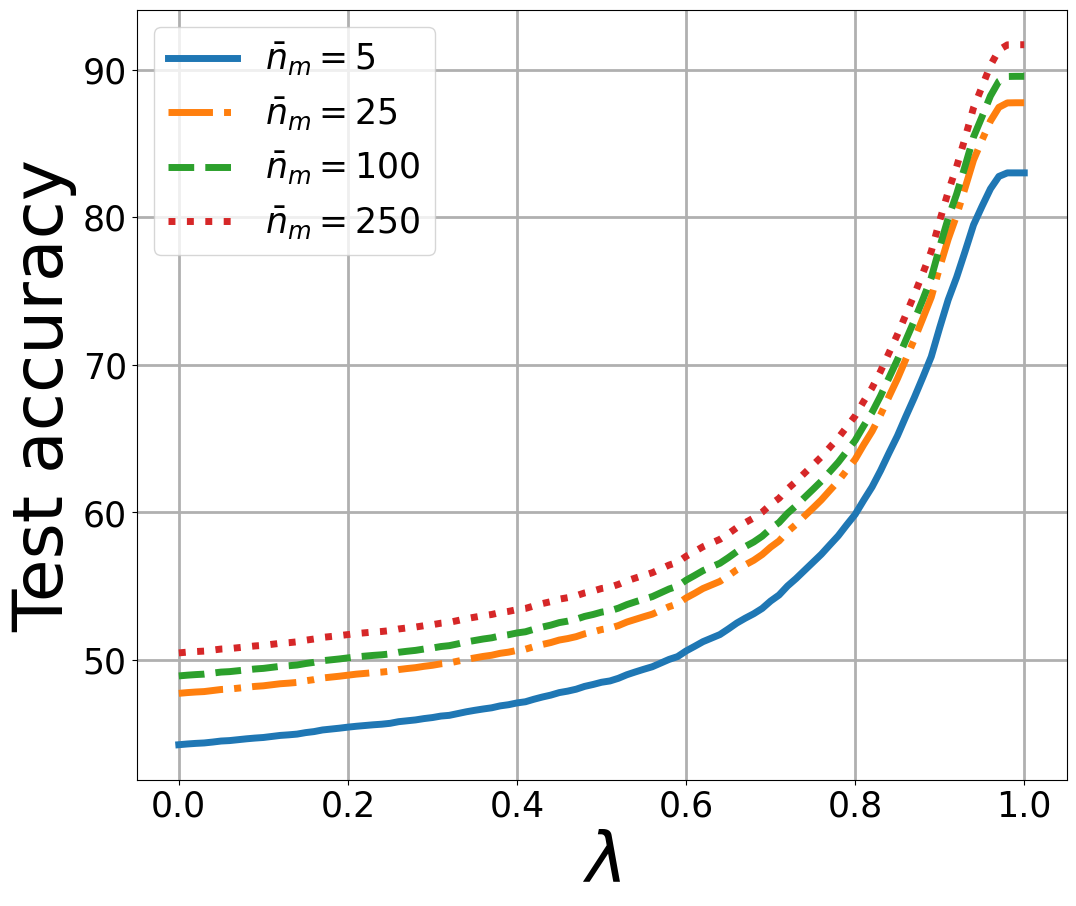

In [17]:
import matplotlib.pyplot as plt
import numpy as np

average_scores = np.nan_to_num(all_scores_).sum(axis=0) / n_test_samples_.sum()


fig, ax = plt.subplots(figsize=(12, 10))

# Ensure we're indexing within bounds of average_scores
if average_scores.ndim > 1 and average_scores.shape[1] > 2:
    accuracies = average_scores[:, 2]
    ax.plot(
        weights_grid_,
        100 * accuracies,
        linewidth=5.0,
        label=r"$\bar{n}_{m} = 5$"
    )

if average_scores.ndim > 1 and average_scores.shape[1] > 10:
    accuracies = average_scores[:, 10]
    ax.plot(
        weights_grid_,
        100 * accuracies,
        linewidth=5.0,
        linestyle="dashdot",
        label=r"$\bar{n}_{m} = 25$"
    )

if average_scores.ndim > 1 and average_scores.shape[1] > 25:
    accuracies = average_scores[:, 25]
    ax.plot(
        weights_grid_,
        100 * accuracies,
        linewidth=5.0,
        linestyle="dashed",
        label=r"$\bar{n}_{m} = 100$"
    )

if average_scores.ndim > 1 and average_scores.shape[1] > 0:
    accuracies = average_scores[:, -1]
    ax.plot(
        weights_grid_,
        100 * accuracies,
        linewidth=5.0,
        linestyle="dotted",
        label=r"$\bar{n}_{m} = 250$"
    )

ax.grid(True, linewidth=2)

ax.set_ylabel("Test accuracy", fontsize=50)
ax.set_xlabel(r"$\lambda$", fontsize=50)
ax.tick_params(axis='both', labelsize=25)

ax.legend(fontsize=25)

plt.show()
plt.savefig("figure.pdf", format="pdf", bbox_inches="tight")

plt.close()

# New Clients Accuracy Plots

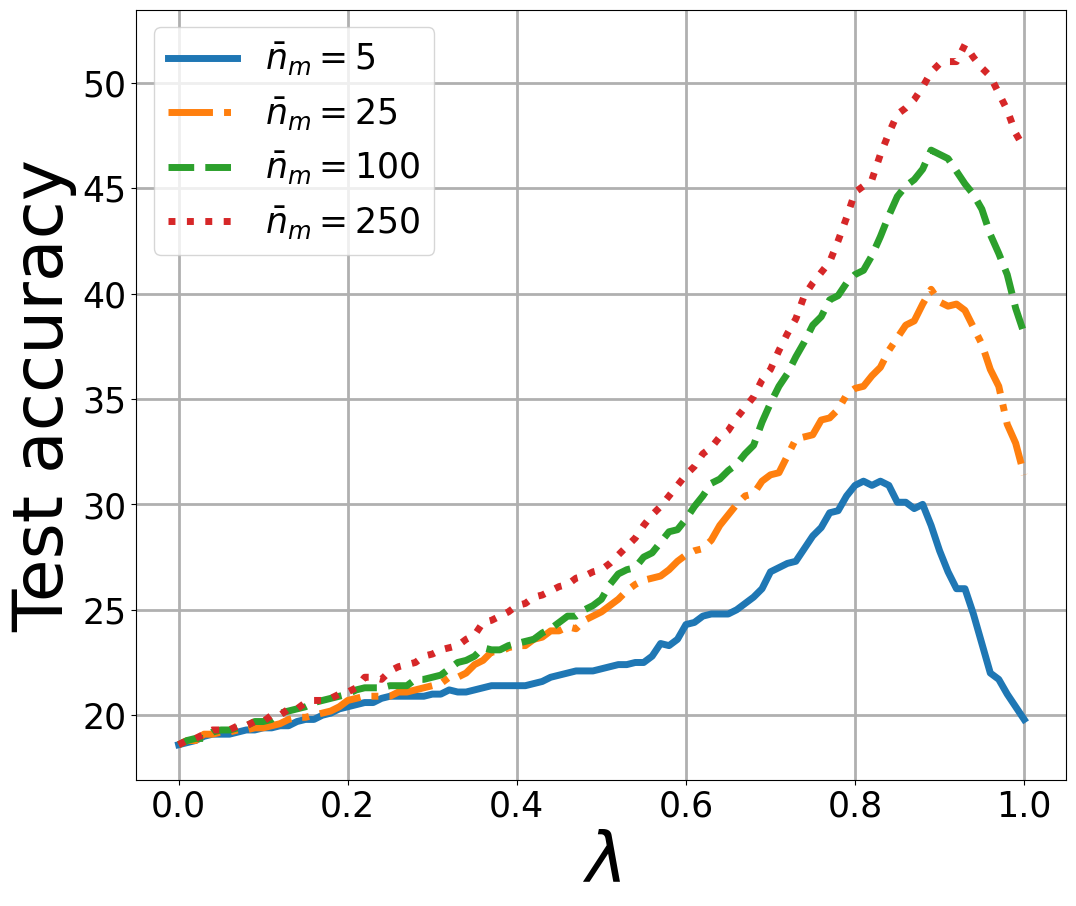

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `all_scores_`, `n_test_samples_`, and `weights_grid_` are defined

# Calculate average scores using only the last 10 lists in all_scores_
average_scores = np.nan_to_num(all_scores_[-10:]).sum(axis=0) / n_test_samples_[-10:].sum()

# Plot setup
fig, ax = plt.subplots(figsize=(12, 10))

# Ensure we're indexing within bounds of average_scores
if average_scores.ndim > 1 and average_scores.shape[1] > 2:
    accuracies = average_scores[:, 2]
    ax.plot(
        weights_grid_,
        100 * accuracies,
        linewidth=5.0,
        label=r"$\bar{n}_{m} = 5$"
    )

if average_scores.ndim > 1 and average_scores.shape[1] > 10:
    accuracies = average_scores[:, 10]
    ax.plot(
        weights_grid_,
        100 * accuracies,
        linewidth=5.0,
        linestyle="dashdot",
        label=r"$\bar{n}_{m} = 25$"
    )

if average_scores.ndim > 1 and average_scores.shape[1] > 25:
    accuracies = average_scores[:, 25]
    ax.plot(
        weights_grid_,
        100 * accuracies,
        linewidth=5.0,
        linestyle="dashed",
        label=r"$\bar{n}_{m} = 100$"
    )

# This if block now ensures that we use the last column of `average_scores`
if average_scores.ndim > 1 and average_scores.shape[1] > 0:
    accuracies = average_scores[:, -1]
    ax.plot(
        weights_grid_,
        100 * accuracies,
        linewidth=5.0,
        linestyle="dotted",
        label=r"$\bar{n}_{m} = 250$"
    )

# Grid, labels, and legend
ax.grid(True, linewidth=2)
ax.set_ylabel("Test accuracy", fontsize=50)
ax.set_xlabel(r"$\lambda$", fontsize=50)
ax.tick_params(axis='both', labelsize=25)

# Display the legend
ax.legend(fontsize=25)

# Save the figure as a PDF
plt.savefig("figure.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()


plt.close()


In [ ]:
dataset_type = 'val'

In [ ]:
np.shape(train_labels)

(500,)

In [ ]:
train_model_outputs

array([[-0.10782309, -0.09417082,  0.01059922, ..., -0.14025618,
         0.03261588,  0.08828189],
       [-0.02292016, -0.01290422, -0.03507423, ..., -0.05264475,
        -0.0388095 ,  0.03415398],
       [ 0.05200854, -0.15548858, -0.07407577, ...,  0.12968132,
         0.14343882,  0.09247203],
       ...,
       [ 0.07453182, -0.1993986 ,  0.12716118, ..., -0.03932567,
        -0.10854694,  0.21499598],
       [ 0.22368403,  0.11447505,  0.05224006, ...,  0.0940222 ,
        -0.05141363,  0.03779344],
       [ 0.0607192 , -0.10479075,  0.05141495, ...,  0.18779755,
         0.01024441,  0.07063146]], dtype=float32)